## Funcion de perdida 

la red neuronal esta en cargada de hacer una prediccion pero para saber la si predice bien o no se usa la funcion de perdida
si la funcion de perdida es muy alta entonces hay una mala prediccion 
si espequeña, la prediccion es muy buena


* tipos de funcion de perdida: 
- crossentropy: para predicciones de clacificacion, mide distrancias entre la prediccion real y el algoritmo 
- midSquareaerror mSE: (regrecion lineal) toma la distancia del valor predicho con el valor real elevandolo al cuadrado, es bueno para predecir proeemplo el valor de una casa 


In [2]:
import numpy as np 
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
#error cuadratico medio 
#y_hat = y predicho
#y = y real
def mse(y, y_hat, derivada=False):
    if derivada:
        return (y_hat-y)
    else:
        return np.mean((y_hat - y)**2)

In [4]:
#probandolo
valor_real = np.array([0,0,1,1])
prediccion = np.array([0.9,0.5,0.2,0.0])

In [ ]:
#usando el mse para lo de arriba
mse(valor_real,prediccion)  #error de la funcion de perdia alto de 0.75

np.float64(0.675)

## Descenso del gradiente

las funciones se pueden derivar y encuentro la pendiente, en puntos donde hay pendiente, tiende a 0 
se busca el punto mas bajo de la funcion de perdia 

## Backpropagation

coo distribuyo el error en la red neuronal desde la perdida 

la idea es hayar el minimo glbal de la funcion de perdida

¿como se distribute el error de la ultima capa ?
se evalua la red con aprendisaje inverso desde la ultima capa hasta la primera distributendo el error de perdia y el gradiente mediente derivadas parciales


## playground tensorflow

https://playground.tensorflow.org/#activation=tanh&regularization=L1&batchSize=10&dataset=xor&regDataset=reg-gauss&learningRate=0.01&regularizationRate=0.01&noise=15&networkShape=2&seed=0.60423&showTestData=false&discretize=false&percTrainData=40&x=false&y=false&xTimesY=true&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

## Dimensiones, tensores y reshape

tensor 4d es una imagen:canales, alto,ancho,ejemplos 

In [9]:
#importando libreria 
import numpy as np

Scalares ( no tienen dimensiones , numero unicos )

In [ ]:
x=np.array(42)
print(x.shape)
print(x.ndim)#dimension

()
0


vector

In [ ]:
x=np.array([42,3,5,3,6,7])
print(x.shape)
print(x.ndim)#dimension

(6,)
1


matriz

In [18]:
x=np.array([[42,3,5,3,6,7],[66,54,5,343,6,7]])
print(x.shape)
print(x.ndim)#dimension

(2, 6)
2


Tensor 4D

In [20]:
x=np.array([[[42,3,5,3,6,7],[66,54,5,343,6,7]],
            [[42,3,5,3,6,7],[66,54,5,343,6,7]],
            [[42,3,5,3,6,7],[66,54,5,343,6,7]]])
print(x.shape)
print(x.ndim)#dimension

(3, 2, 6)
3


Reshape (cambia la forma), se uso en mnist, porque eran 28x28 

In [21]:
x= np.array([[0,1],
          [2,3],
          [4,5],
          [6,7],
        ])
x.shape #forma de x

(4, 2)

In [22]:
x.reshape(8,1)#8 valores en una dimension

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [23]:
x.reshape(2,4)

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [25]:
#transpuesta
np.transpose(x)

array([[0, 2, 4, 6],
       [1, 3, 5, 7]])

In [26]:
#otra manera de transpuesta 
x.T

array([[0, 2, 4, 6],
       [1, 3, 5, 7]])

## creando nuetsra red neuronal usando numpy y matematicas

In [32]:
import numpy as np
import matplotlib as plt
from sklearn.datasets import make_gaussian_quantiles

In [34]:
N=1000#ejemplos 
#creando circulos gaussianos 
gaussian_quantiles=make_gaussian_quantiles(mean=None,
                        n_samples=N,
                        n_features=2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None)
#usarlo en x y y 
X, Y = gaussian_quantiles

In [ ]:
X.shape#1000 ejemplos y dos caracteristicas

(1000, 2)

In [36]:
Y = Y[:, np.newaxis]

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles


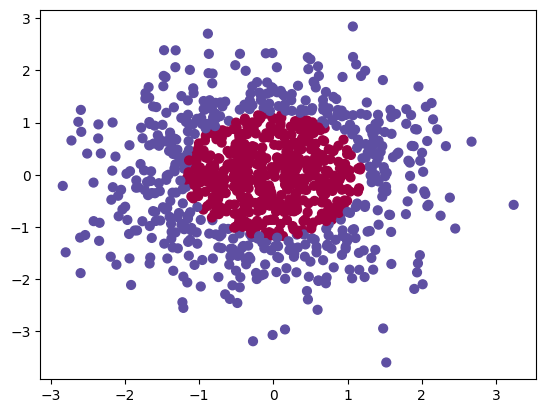

In [42]:
#graficando 
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)
plt.show()



Funcion de activacion

In [43]:
#crear funcion de activacion y de perdida


#funcion sigmoide

def sigmoide(x, derivada=False):
    if derivada:
        return np.exp(-x)/((np.exp(-x)+1)**2)
    else:
        return 1/(1+np.exp(-x))
    
def relu(x, derivada=False):
    if derivada:
        x[x<=0]=0
        x[x<0]=1
        return X
    else:
        return np.maximun(0,x)


funcion de perdida

In [44]:
#error cuadratico medio 
#y_hat = y predicho
#y = y real
def mse(y, y_hat, derivada=False):
    if derivada:
        return (y_hat-y)
    else:
        return np.mean((y_hat - y)**2)

In [54]:
#crear la estructura de la red neuronal 
#crear pesos y bayes
#crear primeor una lista para meterla estructura de la red

def inicialize_parameters_deep(layers_dim):
    parameters = {}
    #tamaño del arreglo que viene
    L = len(layers_dim)
    for l in range(0,L-1):
        parameters['W'+str(l+1)]=(np.random.rand(layers_dim[l],layers_dim[l+1]) * 2) -1 #pesos
        parameters['b'+str(l+1)]=(np.random.rand(1,layers_dim[l+1]) * 2) -1 #bayas 
    return parameters 

In [55]:
#crear los pesos de manera aleatoria
#np.random.rand(10,3)#10 ejemplos, 3 numeros de 0 a 1

In [56]:
layer_dims =[2,4,8,1]#numero de neuronas 
params = inicialize_parameters_deep(layer_dims)

In [57]:
params 

{'W1': array([[ 0.31392783, -0.93728369,  0.23125508, -0.47833926],
        [-0.42000985,  0.82472005,  0.1619067 , -0.21599931]]),
 'b1': array([[-0.8807258 , -0.78747689, -0.24627955,  0.95314768]]),
 'W2': array([[ 0.09647088,  0.87410948, -0.35295746,  0.0368574 , -0.64867397,
         -0.8831119 ,  0.46076615,  0.25418134],
        [ 0.22453607,  0.65287071, -0.30399552,  0.06182845,  0.02704423,
          0.99071092,  0.00412507,  0.92342711],
        [ 0.33630843,  0.07662954, -0.84217498, -0.07804855,  0.50298012,
          0.49072885,  0.35298422,  0.59458017],
        [-0.19846454,  0.37989002, -0.2047835 ,  0.79123068, -0.48544383,
         -0.83525259, -0.10529249,  0.53224001]]),
 'b2': array([[ 0.30243671,  0.19242713,  0.37365581,  0.68397178, -0.6444971 ,
          0.11897599, -0.76225175, -0.67815105]]),
 'W3': array([[-0.16489468],
        [-0.3784588 ],
        [ 0.7982284 ],
        [ 0.60721042],
        [-0.50565203],
        [ 0.63232003],
        [ 0.36136707],
